In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Evaluation creterions

In [2]:
common_metrics = [
            "Exploration Face loss",
#             "Exploration Edge loss",
#             "Exploration Chamfer loss",
#             "Map Face loss",
#             "Map Edge loss",
#             "Map Chamfer loss",
            "Exploration completeness",
            "Artifacts Exploration completeness",
            "Detections score",
            "Total expected reward",
            "Total artifacts reward",
            "Travelled distance",
            "Actual reward"
          ]

# worlds = ["simple_cave_01", "simple_cave_02", "simple_cave_03"]
worlds = ["simple_cave_01"]

MIN_EXP_COMPL = 0.05

# paths = ['../data/bags/mapping_eval/old/metrics/']
paths = ['../data/bags/mapping_eval/']

### All experiments

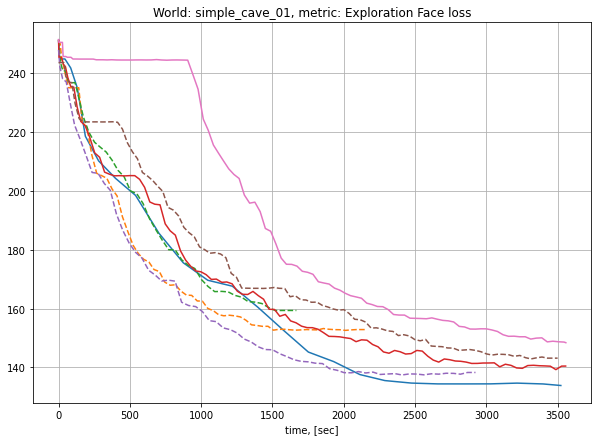

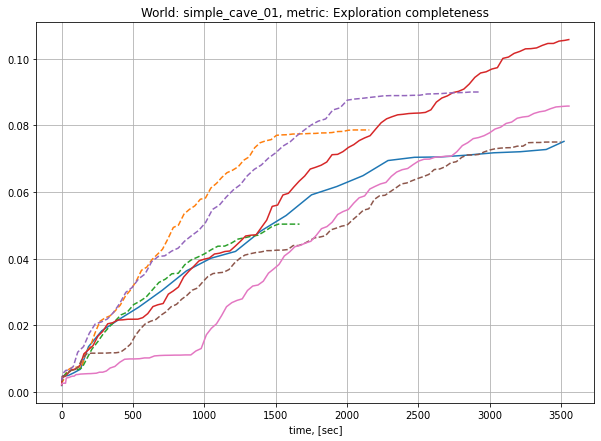

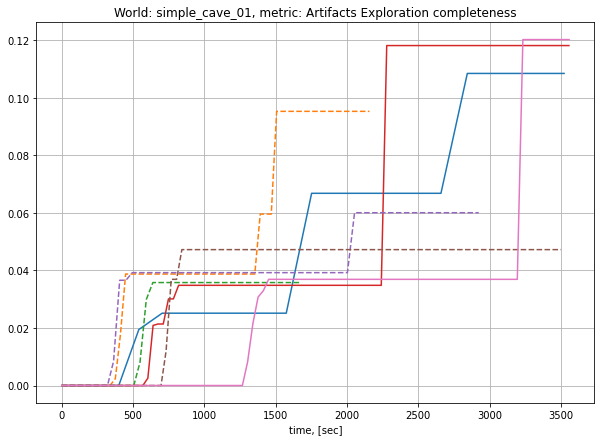

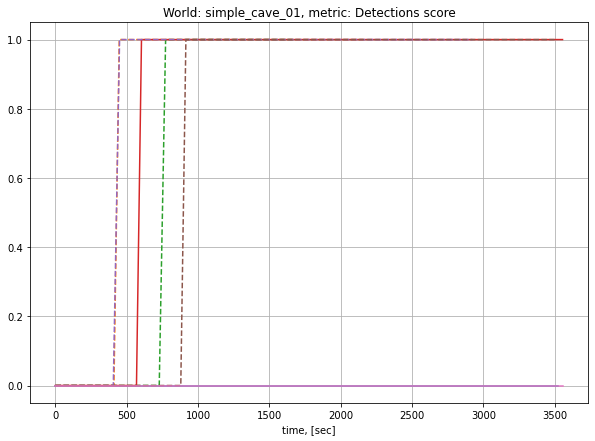

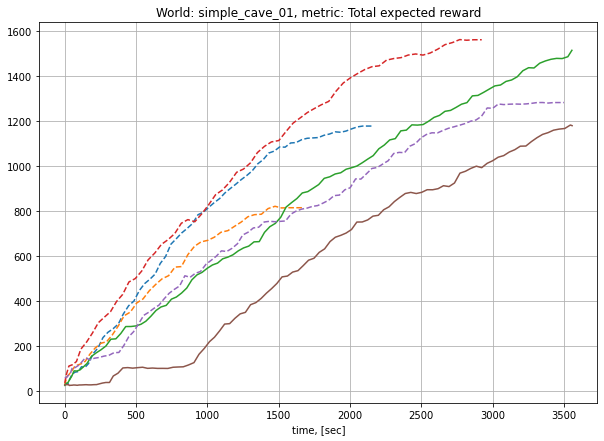

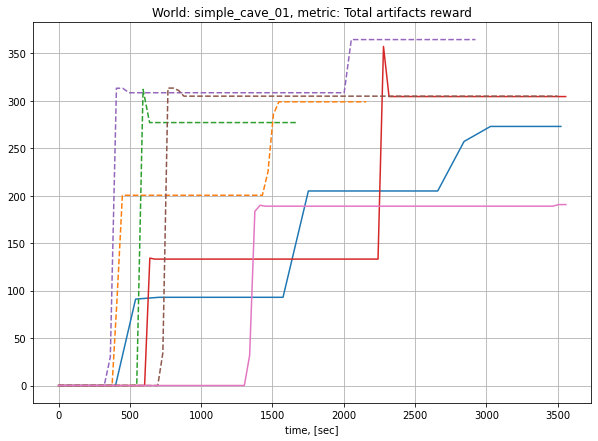

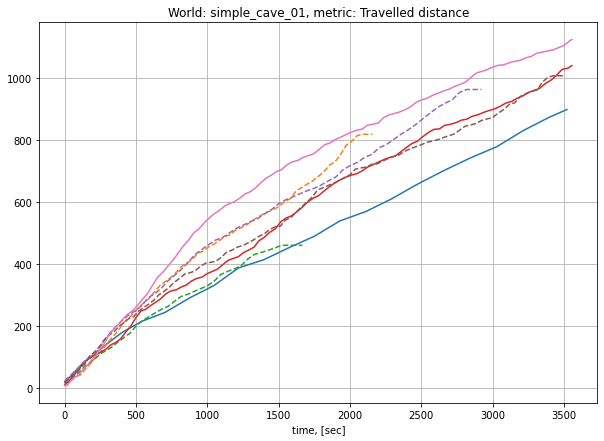

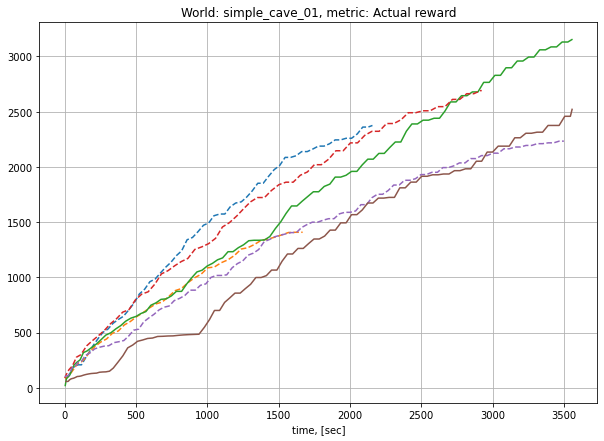

In [3]:
for world in worlds:
    for i, metric in enumerate(common_metrics):
        plt.figure(figsize=(10, 7))
        plt.title(f"World: {world}, metric: {metric}")
        for path in paths:
            xls_files = [file for file in os.listdir(path) if 'xls' in file and world in file]
            for file in xls_files:
                data = pd.read_excel(os.path.join(path, file))
                if metric in data and \
                   np.max(data['Exploration completeness']) > MIN_EXP_COMPL and \
                   np.max(data[metric]) >= 0:
                    ls = 'solid' if 'true' in file else 'dashed'
                    t = data['Time stamp'] - data['Time stamp'][0]
                    plt.plot(t, data[metric], linestyle=ls, label=file)
        plt.grid()
        plt.xlabel('time, [sec]')
        plt.show()
        plt.close()
        # plt.legend();

In [4]:
data.head()

,Time stamp,Exploration Face loss,Exploration Edge loss,Exploration Chamfer loss,Exploration completeness,Map Face loss,Map Edge loss,Map Chamfer loss,Artifacts Exploration completeness,Detections score,Total expected reward,Total artifacts reward,Travelled distance,Actual reward
0,74.178877,251.531372,NaN,NaN,0.00224,0.469646,NaN,NaN,0.0,0,25.754467,0.0,8.974955,NaN
1,77.119580,250.579269,NaN,NaN,0.00266,0.505783,NaN,NaN,0.0,0,26.830536,0.0,8.974955,NaN
2,82.003936,250.579269,NaN,NaN,0.00266,0.505783,NaN,NaN,0.0,0,26.830536,0.0,8.974955,57.767326
3,86.809495,250.579269,NaN,NaN,0.00266,0.505783,NaN,NaN,0.0,0,26.830536,0.0,8.974955,57.767326
4,91.610822,250.579269,NaN,NaN,0.00266,0.505783,NaN,NaN,0.0,0,26.830536,0.0,8.974955,57.767326


### Average results

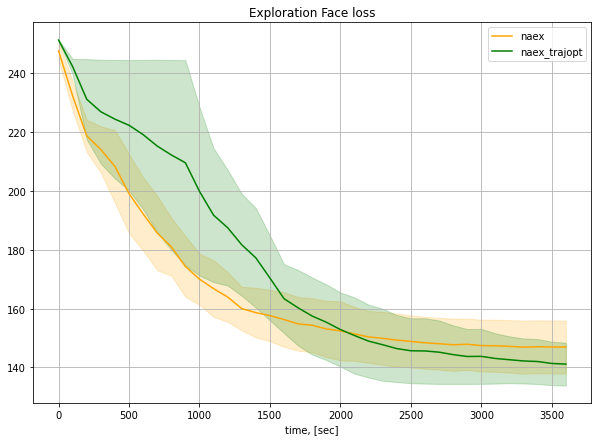

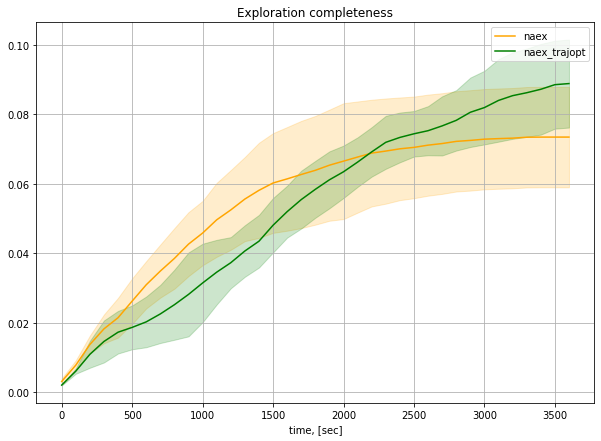

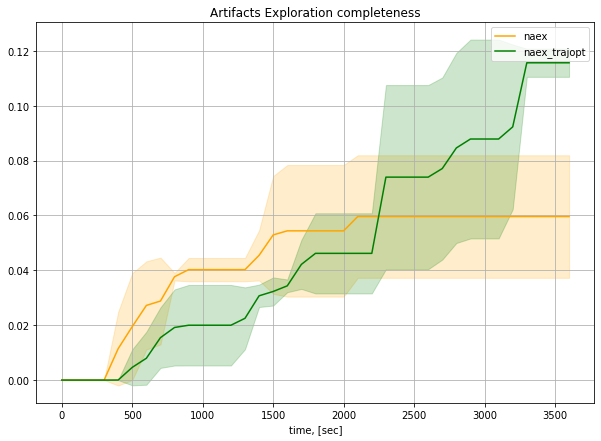

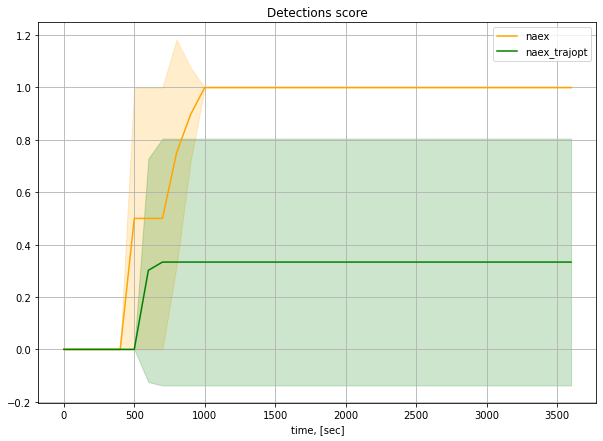

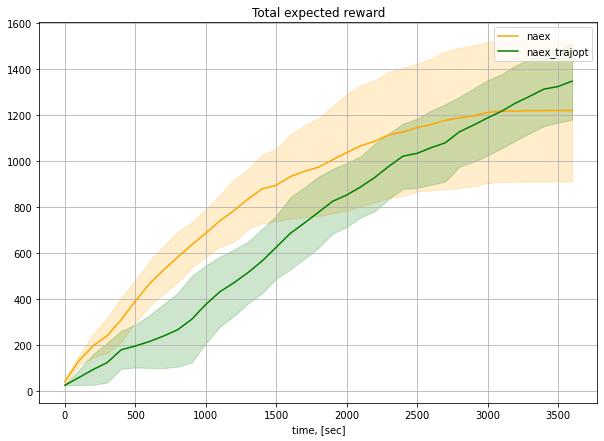

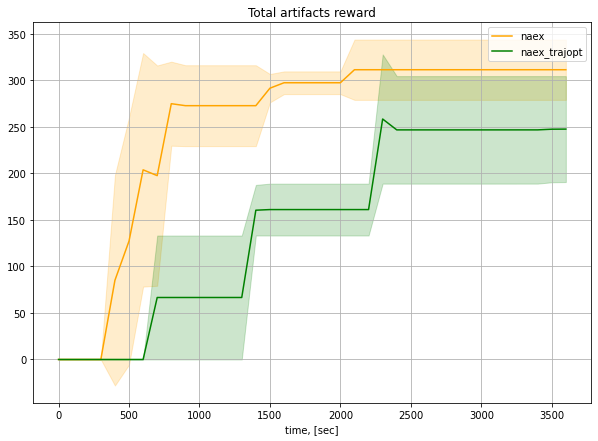

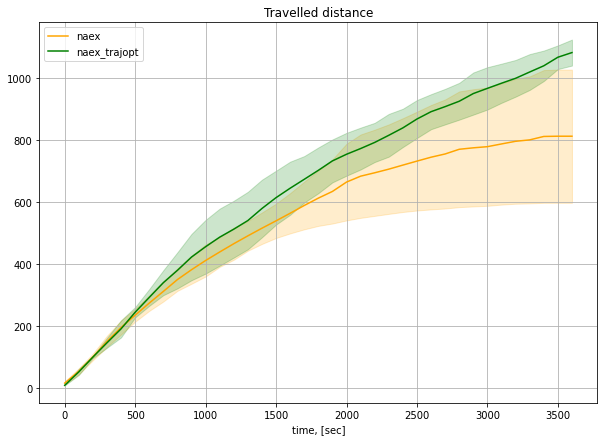

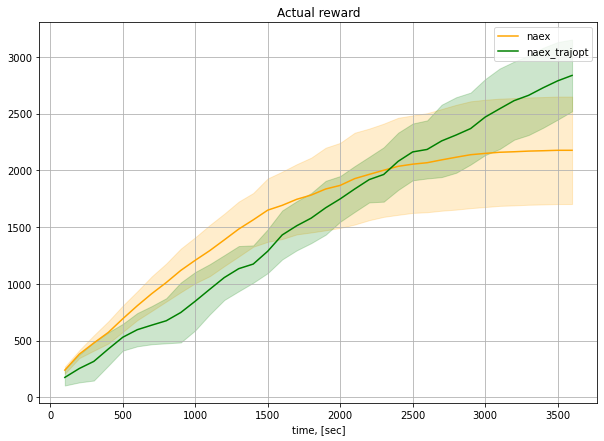

In [5]:
# all metrics files
for path in paths:
    xls_files_all = [os.path.join(path, file) for file in os.listdir(path) if 'xls' in file]

# filter by world names
xls_files = []
for file in xls_files_all:
    for world in worlds:
        if world in file:
            xls_files.append(file)
    
for metric in common_metrics:
    ts, values = [], []
    ts_trajopt, values_trajopt = [], []
    for file in xls_files:
        data = pd.read_excel(file)

        if metric in data and \
           np.max(data['Exploration completeness']) > MIN_EXP_COMPL and \
           np.max(data[metric]) >= 0:
            
            t = np.array(data["Time stamp"] - data["Time stamp"][0])
            value = np.array(data[metric])

            if 'true' in file:
                ts_trajopt.append(t)
                values_trajopt.append(value)
            elif 'false' in file:
                ts.append(t)
                values.append(value)
        else:
            xls_files.remove(file)
    if len(xls_files) == 0:
        print('No data')
        break

    t_mean = np.linspace(0, 3600, 37)

    values_interp = [np.interp(t_mean, t, v) for t, v in zip(ts, values)]
    mean = np.mean(values_interp, axis=0) 
    std = np.std(values_interp, axis=0)
    
    values_interp = [np.interp(t_mean, t, v) for t, v in zip(ts_trajopt, values_trajopt)]
    mean_trajopt = np.mean(values_interp, axis=0) 
    std_trajopt = np.std(values_interp, axis=0)

    plt.figure(figsize=(10, 7))
    plt.title(metric)
    # for t, v, v_interp in zip(ts, values, values_interp):
    #     plt.plot(t, v)
    #     plt.plot(t_mean, v_interp, 'x')

    plt.plot(t_mean, mean, label='naex', color='orange')
    plt.fill_between(t_mean, mean-std, mean+std, color='orange', alpha=0.2)
    
    plt.plot(t_mean, mean_trajopt, label='naex_trajopt', color='green')
    plt.fill_between(t_mean, mean_trajopt-std_trajopt, mean_trajopt+std_trajopt, color='green', alpha=0.2)
    
    plt.grid()
    plt.xlabel('time, [sec]')
    plt.legend()
    plt.show()
    plt.close()

In [6]:
[file for file in xls_files if "simple_cave_01" in file]

['../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_01_images_rewards_hyps_ritz_2021-07-22-12-33-22.xls',
 '../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_01_images_rewards_hyps_021-07-15-14-35-16.xls',
 '../data/bags/mapping_eval/explorer_x1_opt_path_true_simple_cave_01_images_rewards_hyps_goedel_2021-07-22-14-05-59.xls',
 '../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_01_images_rewards_hyps_2021-07-15-13-04-52.xls',
 '../data/bags/mapping_eval/explorer_x1_opt_path_false_simple_cave_01_images_rewards_hyps_2021-07-15-13-14-12.xls',
 '../data/bags/mapping_eval/explorer_x1_opt_path_true_simple_cave_01_images_rewards_hyps_goedel_2021-07-22-12-31-46.xls']